<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/All_Regimes_WTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('all.txt',sep='\t')

In [22]:
df['dP'] = np.zeros(len(df))

df['dP'][0] = 5000 - df['p'][0]

df['dP'][1:] = abs(np.diff(df['p']))

df.head()

,t,p,dP
0,0.000100,4992.57,7.43
1,0.000212,4983.91,8.66
2,0.000339,4974.73,9.18
3,0.000481,4964.73,10.00
4,0.000642,4953.53,11.20


In [23]:
df['dt'] = np.zeros(len(df))

df['dt'][0] = df['t'][0]

df['dt'][1:] = abs(np.diff(df['t']))

df.head()

,t,p,dP,dt
0,0.000100,4992.57,7.43,0.000100
1,0.000212,4983.91,8.66,0.000112
2,0.000339,4974.73,9.18,0.000127
3,0.000481,4964.73,10.00,0.000142
4,0.000642,4953.53,11.20,0.000160


In [24]:
df['tdP/dt'] = df['t']*df['dP']/df['dt']

df.head()

,t,p,dP,dt,tdP/dt
0,0.000100,4992.57,7.43,0.000100,7.430000
1,0.000212,4983.91,8.66,0.000112,16.357778
2,0.000339,4974.73,9.18,0.000127,24.593272
3,0.000481,4964.73,10.00,0.000142,33.813614
4,0.000642,4953.53,11.20,0.000160,44.863069


In [25]:
df['t_1/2'] = np.sqrt(df['t'])

df['t_1/4'] = np.sqrt(df['t_1/2'])

df['t_(-1/2)'] = (df['t'])**(-0.5)

df.head()

,t,p,dP,dt,tdP/dt,t_1/2,t_1/4,t_(-1/2)
0,0.000100,4992.57,7.43,0.000100,7.430000,0.010000,0.100000,100.000000
1,0.000212,4983.91,8.66,0.000112,16.357778,0.014577,0.120737,68.599434
2,0.000339,4974.73,9.18,0.000127,24.593272,0.018414,0.135697,54.307499
3,0.000481,4964.73,10.00,0.000142,33.813614,0.021942,0.148128,45.574998
4,0.000642,4953.53,11.20,0.000160,44.863069,0.025330,0.159155,39.478353


In [28]:
df['d(t_1/2)'] = df['t_1/2']

df['d(t_1/2)'][1:] = abs(np.diff(df['d(t_1/2)']))

df['dP/dt_1/2'] = df['dP']/df['d(t_1/2)']

df.head()

,t,p,dP,dt,tdP/dt,t_1/2,t_1/4,t_(-1/2),d(t_1/2),dP/dt_1/2
0,0.000100,4992.57,7.43,0.000100,7.430000,0.010000,0.100000,100.000000,0.010000,743.000000
1,0.000212,4983.91,8.66,0.000112,16.357778,0.014577,0.120737,68.599434,0.004577,1891.912076
2,0.000339,4974.73,9.18,0.000127,24.593272,0.018414,0.135697,54.307499,0.003836,2392.940876
3,0.000481,4964.73,10.00,0.000142,33.813614,0.021942,0.148128,45.574998,0.003528,2834.313213
4,0.000642,4953.53,11.20,0.000160,44.863069,0.025330,0.159155,39.478353,0.003388,3305.314340


In [29]:
df['d(t_1/4)'] = df['t_1/4']

df['d(t_1/4)'][1:] = abs(np.diff(df['d(t_1/4)']))

df['dP/dt_1/4'] = df['dP']/df['d(t_1/4)']

df.head()

,t,p,dP,dt,tdP/dt,t_1/2,t_1/4,t_(-1/2),d(t_1/2),dP/dt_1/2,d(t_1/4),dP/dt_1/4
0,0.000100,4992.57,7.43,0.000100,7.430000,0.010000,0.100000,100.000000,0.010000,743.000000,0.100000,74.300000
1,0.000212,4983.91,8.66,0.000112,16.357778,0.014577,0.120737,68.599434,0.004577,1891.912076,0.020737,417.614656
2,0.000339,4974.73,9.18,0.000127,24.593272,0.018414,0.135697,54.307499,0.003836,2392.940876,0.014960,613.630861
3,0.000481,4964.73,10.00,0.000142,33.813614,0.021942,0.148128,45.574998,0.003528,2834.313213,0.012431,804.448345
4,0.000642,4953.53,11.20,0.000160,44.863069,0.025330,0.159155,39.478353,0.003388,3305.314340,0.011027,1015.666599


In [30]:
df['d(t_-0.5)'] = df['t_(-1/2)']

df['d(t_-0.5)'][1:] = abs(np.diff(df['d(t_-0.5)']))

df['dP/dt_(-1/2)'] = df['dP']/df['d(t_-0.5)']

df.head()

,t,p,dP,dt,tdP/dt,t_1/2,t_1/4,t_(-1/2),d(t_1/2),dP/dt_1/2,d(t_1/4),dP/dt_1/4,d(t_-0.5),dP/dt_(-1/2)
0,0.000100,4992.57,7.43,0.000100,7.430000,0.010000,0.100000,100.000000,0.010000,743.000000,0.100000,74.300000,100.000000,0.074300
1,0.000212,4983.91,8.66,0.000112,16.357778,0.014577,0.120737,68.599434,0.004577,1891.912076,0.020737,417.614656,31.400566,0.275791
2,0.000339,4974.73,9.18,0.000127,24.593272,0.018414,0.135697,54.307499,0.003836,2392.940876,0.014960,613.630861,14.291935,0.642320
3,0.000481,4964.73,10.00,0.000142,33.813614,0.021942,0.148128,45.574998,0.003528,2834.313213,0.012431,804.448345,8.732500,1.145147
4,0.000642,4953.53,11.20,0.000160,44.863069,0.025330,0.159155,39.478353,0.003388,3305.314340,0.011027,1015.666599,6.096645,1.837076


In [42]:
plt.figure(figsize=(12,4))

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

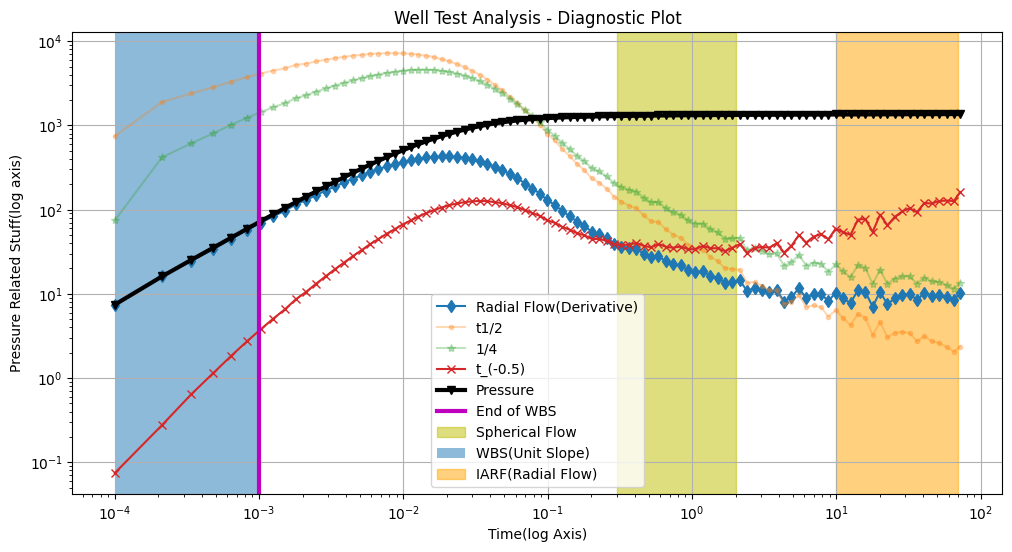

In [78]:
plt.figure(figsize=(12,6))
plt.style.use('default')


plt.loglog(df['t'],df['tdP/dt'],label='Radial Flow(Derivative)',marker='d')

plt.loglog(df['t'],df['dP/dt_1/2'],label='t1/2',marker='.',alpha=0.3)

plt.loglog(df['t'],df['dP/dt_1/4'],label='1/4',marker='*',alpha=0.3)

plt.loglog(df['t'],df['dP/dt_(-1/2)'],label='t_(-0.5)',marker='x')

plt.loglog(df['t'],abs(5000-df['p']),label='Pressure',linewidth='3',marker='v',color='black')

plt.axvline(x=0.001,label='End of WBS',color='m',linewidth=3)

# plt.axvline(x=0.3)
# plt.axvline(x=2)
plt.axvspan(0.3,2.0,alpha=0.5,label='Spherical Flow',color='y')
plt.axvspan(0.0001,0.001,alpha=0.5,label='WBS(Unit Slope)')
plt.axvspan(10,70,alpha=0.5,label='IARF(Radial Flow)',color='orange')

plt.xlabel('Time(log Axis)')
plt.ylabel('Pressure Related Stuff(log axis)')

plt.title('Well Test Analysis - Diagnostic Plot')
plt.legend(loc='best')

plt.grid()

